# Problem set 4: Analyzing data

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/exercises-2022/master?urlpath=lab/tree/PS4/problem_set_4.ipynb)

In [1]:
import pydst
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
dst = pydst.Dst(lang='en')

# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [2]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [3]:
nah1 = dst.get_data(table_id = 'NAH1', variables={'TRANSAKT':'*', 'PRISENHED':'*', 'TID':'*'})

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [142]:
nah1_true = nah1.copy()
nah1_true.rename(columns=columns_dict,inplace=True)

# c. replace data
for key,value in var_dict.items():
    nah1_true.variable.replace(key,value,inplace=True)

for key,value in unit_dict.items():
    nah1_true.unit.replace(key,value,inplace=True)

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [172]:
# d. keep if in var_dict
"""
I = False
for key,value in var_dict.items():
    I = I | (nah1_true.variable == value)
nah1_true = nah1_true[I] """

I = nah1_true["variable"].isin(var_dict.items())
df = nah1_true.loc[I]
   
# e. convert values to numeric
nah1_true.value = nah1_true.value.astype('float')

# d. summary statistics
nah1_true.groupby(['variable','unit']).describe()

nah1_true

,variable,unit,year,value,first,indexed
0,M,nominal,1966,24406.0,24406.0,1.000000
11,Y,real,1966,1089347.0,1089347.0,1.000000
10,Y,nominal,1966,144582.0,144582.0,1.000000
9,M,real,1966,112171.0,112171.0,1.000000
7,X,real,1966,123594.0,123594.0,1.000000
...,...,...,...,...,...,...
661,Y,nominal,2021,4406664.0,144582.0,30.478649
660,Y,real,2021,3811174.0,1089347.0,3.498586
670,M,nominal,2021,1310530.0,24406.0,53.697042
664,G,real,2021,540273.0,171307.0,3.153829


**Step 4:** Discuss what the following summary statistics show.

In [144]:
nah1 = nah1_true.copy()
nah1_true.groupby(['variable','unit']).describe()

year                     ...      value                       
                 count    mean        std  ...        50%         75%        max
variable unit                              ...                                  
C        nominal  56.0  1993.5  16.309506  ...   722796.5  1263176.50  1742746.0
         real     56.0  1993.5  16.309506  ...  1014769.5  1341092.00  1549423.0
G        nominal  56.0  1993.5  16.309506  ...   238657.5   430446.25   612087.0
         real     56.0  1993.5  16.309506  ...   351936.0   462233.25   540273.0
I        nominal  56.0  1993.5  16.309506  ...   182014.5   352455.00   576732.0
         real     56.0  1993.5  16.309506  ...   234810.0   354682.50   510947.0
M        nominal  56.0  1993.5  16.309506  ...   293706.5   785699.50  1310530.0
         real     56.0  1993.5  16.309506  ...   344339.5   792824.00  1160884.0
X        nominal  56.0  1993.5  16.309506  ...   353569.5   863858.75  1478926.0
         real     56.0  1993.5  16.309506  ...   457006.5   910779.50  1275598.0
Y        nominal  56.0  1993.5  16.309506  ...  1553203.0  3025075.75  4406664.0
         real     56.0  1993.5  16.309506  ...  2159371.0  3140076.50  3811174.0

[12 rows x 16 columns]

**Answer:** See A1.py

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [61]:
pop = dst.get_data(table_id = 'FT', variables={'HOVEDDELE':['*'], 'TID':['*']})
pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
I = pop.HOVEDDELE == 'All Denmark'
pop =  pop.loc[I,['year','population']]
pop.head()

,year,population
2,1787,841806
3,1845,1356877
4,1870,1784741
5,1906,2588919
6,1925,3434555


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [62]:
merged = pd.merge(nah1,pop,how='left',on=['year'])
merged.tail(10)

,variable,unit,year,value,population
662,C,real,1992,981584.0,5162126.0
663,C,nominal,1992,684449.0,5162126.0
664,G,real,1992,334136.0,5162126.0
665,G,nominal,1992,223028.0,5162126.0
666,I,real,1992,222852.0,5162126.0
667,I,nominal,1992,174815.0,5162126.0
668,X,real,1992,433602.0,5162126.0
669,X,nominal,1992,341094.0,5162126.0
670,M,real,1992,325129.0,5162126.0
671,M,nominal,1992,277343.0,5162126.0


**Answer:** See A2.py

**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [63]:
pop_with_index = pop.set_index('year')
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_true_with_index = merged.set_index('year')
merged_true_alt = merged_true_with_index.join(pop_with_index)
merged_true_alt.sample(10)

,variable,unit,value,population,population_alt
year,,,,,
1996,I,nominal,218298.0,5251027.0,5251027.0
2011,C,nominal,1375510.0,5560628.0,5560628.0
1998,G,real,387763.0,5294860.0,5294860.0
2004,X,real,765061.0,5397640.0,5397640.0
1992,Y,real,2080460.0,5162126.0,5162126.0
2016,I,real,431163.0,5707251.0,5707251.0
1986,G,real,332830.0,5116273.0,5116273.0
2001,C,nominal,974255.0,5349212.0,5349212.0
2006,Y,nominal,2924455.0,5427459.0,5427459.0


**Answer:** See A3.py

## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

,variable,unit,year,value,first,indexed
0,M,nominal,1966,24406.0,24406.0,1.000000
11,Y,real,1966,1089347.0,1089347.0,1.000000
10,Y,nominal,1966,144582.0,144582.0,1.000000
9,M,real,1966,112171.0,112171.0,1.000000
7,X,real,1966,123594.0,123594.0,1.000000
...,...,...,...,...,...,...
661,Y,nominal,2021,4406664.0,144582.0,30.478649
660,Y,real,2021,3811174.0,1089347.0,3.498586
670,M,nominal,2021,1310530.0,24406.0,53.697042
664,G,real,2021,540273.0,171307.0,3.153829


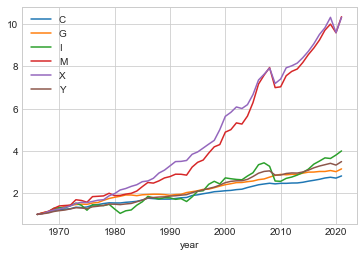

In [165]:
# a. split
nah1_true = nah1.copy()
nah1_true = nah1_true.sort_values(by=['year'], ascending = True)

nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1_true.set_index(['variable','unit','year'],inplace=True)
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true.reset_index(inplace=True)

# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']
nah1_true = nah1_true.sort_values(by=['year'], ascending = True)

# d. plot
def plot(df):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);

plot(nah1_true) 
nah1_true

**Question** Implement the same split-apply-combine as above using `transform`.

In [167]:
def first(x): # select the first element in a series
    return x.iloc[0]

nah1_alt = nah1.copy()
grouped = nah1_alt.groupby(['variable','unit'])
nah1_alt['indexed'] = grouped['value'].transform(lambda x: x/first(x))

nah1_alt.set_index('year')
nah1_alt

,variable,unit,year,value,indexed
6,Y,real,2016,3490451.0,1.000000
7,Y,nominal,2016,3646144.0,1.000000
22,C,real,2016,1436216.0,1.000000
23,C,nominal,2016,1507957.0,1.000000
24,G,real,2016,514586.0,1.000000
...,...,...,...,...,...
3335,I,nominal,1992,174815.0,0.380874
3344,X,real,1992,433602.0,0.386744
3345,X,nominal,1992,341094.0,0.302894
3350,M,real,1992,325129.0,0.326721


**Answer:** See A4.py

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [14]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2021+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.to_datetime(prices_long.d)

# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

,municipality,price,date
0,Hele landet,4021.0,1992-01-01
1,Region Hovedstaden,5836.0,1992-01-01
2,Landsdel København by,5658.0,1992-01-01
3,København,5355.0,1992-01-01
4,Frederiksberg,5183.0,1992-01-01


## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [22]:
# a. load data
pop = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})

# b. drop and rename columns
"""
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
"""
pop = pop.drop(columns = ['ALDER', 'CIVILSTAND', 'KØN'])
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# c. drop non-municipalities
"""
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)
"""
I = pop['municipality'].isin(['Region', 'All'])
pop.drop(pop[I].index, inplace=True)
    
# d. convert to date
pop['date'] = pd.to_datetime(pop.TID)
del pop['TID']

pop.head()

      ALDER CIVILSTAND    KØN     TID    OMRÅDE  INDHOLD
0     Total      Total  Total  2021Q1     Lejre    28173
1     Total      Total  Total  2012Q1   Brøndby    34084
2     Total      Total  Total  2020Q4  Hillerød    51261
3     Total      Total  Total  2020Q4      Faxe    36605
4     Total      Total  Total  2021Q1  Hvidovre    53451
...     ...        ...    ...     ...       ...      ...
5980  Total      Total  Total  2014Q4     Greve    48681
5981  Total      Total  Total  2012Q4    Egedal    42017
5982  Total      Total  Total  2014Q1   Rødovre    37552
5983  Total      Total  Total  2014Q1    Egedal    42210
5984  Total      Total  Total  2012Q4   Rødovre    37329

[5985 rows x 6 columns]


,municipality,population,date
0,Lejre,28173,2021-01-01
1,Brøndby,34084,2012-01-01
2,Hillerød,51261,2020-10-01
3,Faxe,36605,2020-10-01
4,Hvidovre,53451,2021-01-01


## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

      population    date   price  log_population  log_price
4748         NaN     NaT     NaN             NaN        NaN
535         94.0 91 days   374.0        0.001561   0.050483
4385       144.0 91 days    81.0        0.002386   0.010606
3243       -59.0 92 days   282.0       -0.000977   0.036070
1549        24.0 92 days  -721.0        0.000397  -0.094946
...          ...     ...     ...             ...        ...
285          2.0 92 days    59.0        0.000336   0.009500
1543        44.0 90 days  1111.0        0.007355   0.163856
512         12.0 91 days   324.0        0.001997   0.043132
1080        -4.0 92 days   375.0       -0.000665   0.047704
759         13.0 92 days     NaN        0.002160        NaN

[5985 rows x 5 columns]


Text(0, 0.5, 'log difference in price')

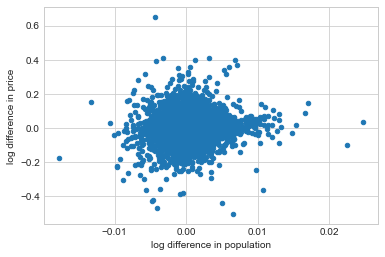

In [24]:
# a. merge
full = pd.merge(pop, prices_long, on=['date','municipality'], how='left')
full.sort_values(['municipality','date'], inplace=True)

# b. take logs
full['log_population'] =  np.log(full['population'])
full['log_price'] =  np.log(full['price'])

# c. figur 1: log differences
axx = full.groupby('municipality').diff(1)
#print(full)
#print(axx)
print(full.groupby('municipality').diff(1))
ax = full.groupby('municipality').diff(1).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('log difference in population') 
ax.set_ylabel('log difference in price')

**Answer:** See A5.py for difference within total population. See A6.py for difference within municipality

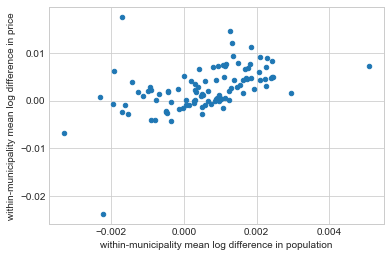

In [30]:
axx2 = (full.groupby('municipality').agg(lambda x: np.mean(x.diff()))) # agg applies function to entire dataframe
ax = full.groupby('municipality').agg(lambda x: np.mean(x.diff())).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('within-municipality mean log difference in population')
ax.set_ylabel('within-municipality mean log difference in price'); 